# This notebook contains more advanced examples

In [1]:
%matplotlib inline

from __future__ import division, absolute_import, print_function

import lmfit
import matplotlib.pyplot as plt
import numpy as np

from resonator import background, reflection, see

In [2]:
# Make some fake data to use for the example fits
f_r = 1e9
frequency = np.linspace(f_r - 1e6, f_r + 1e6, 501)
bg = background.ComplexConstant().func(frequency=frequency, magnitude=0.01, phase=np.pi / 3)
fg = reflection.Reflection().func(frequency=frequency, resonance_frequency=f_r, internal_loss=1e-5, coupling_loss=5e-5)
data = bg * fg + 0.0002 * (np.random.randn(frequency.size) + 1j * np.random.randn(frequency.size))

## Use initial params to improve on the guessing function

The default algorithm used by `lmfit` is Levenberg-Marquardt, which is fast but finds only the local minimum of the residual function given by the initial values. The most common reason for a fit to fail is that the `guess()` function provides initial values that are in a local minimum that is not the global minimum. If a data set that looks "reasonable" fails to converge to the correct values, a quick fix is to try different initial values. 

[[Model]]
    (Model(complex_constant) * Model(reflection))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 1002
    # variables        = 5
    chi-square         = 3.9927e-05
    reduced chi-square = 4.0047e-08
    Akaike info crit   = -17062.2917
    Bayesian info crit = -17037.7430
[[Variables]]
    magnitude:            0.01000089 +/- 9.3744e-06 (0.09%) (init = 0.01031363)
    phase:               -5.23567669 +/- 9.3608e-04 (0.02%) (init = -5.199506)
    resonance_frequency:  1.0000e+09 +/- 108.288735 (0.00%) (init = 1e+09)
    internal_loss:        9.9139e-06 +/- 2.1972e-07 (2.22%) (init = 2.757477e-05)
    coupling_loss:        4.9990e-05 +/- 1.7845e-07 (0.36%) (init = 5.642523e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(magnitude, internal_loss)     =  0.258
    C(phase, resonance_frequency)   = -0.253
    C(internal_loss, coupling_loss) =  0.174



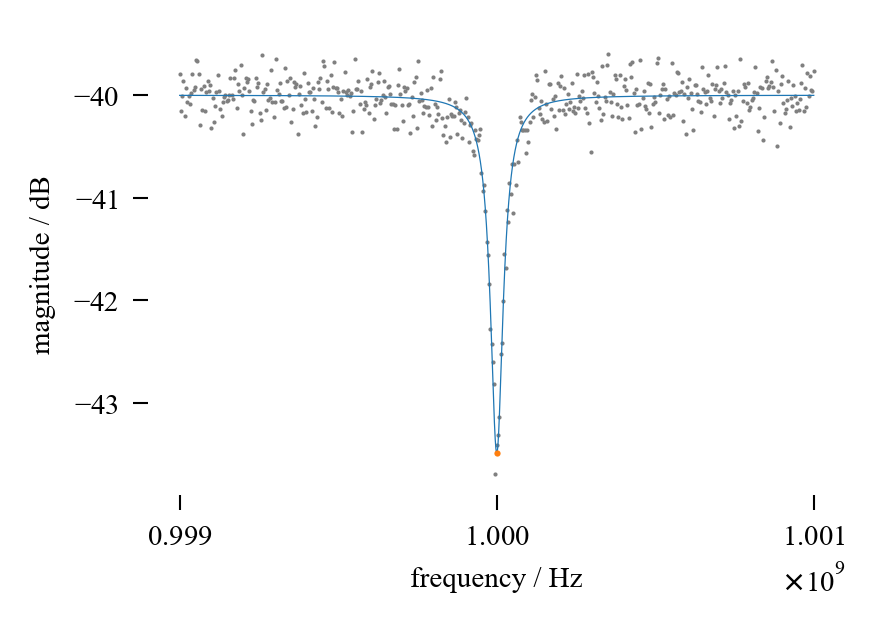

In [3]:
params = lmfit.Parameters()
params.add(name='resonance_frequency', value=1e9) 
r = reflection.ReflectionFitter(frequency=frequency, data=data, params=params)
fig, ax = plt.subplots()
see.magnitude_vs_frequency(resonator=r, axes=ax)
print(r.result.fit_report())

## Use initial parameters to control whether or not to vary a parameter in the fit

For example, the value of the coupling can be fixed to a value from a simulation. 

[[Model]]
    (Model(complex_constant) * Model(reflection))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 30
    # data points      = 1002
    # variables        = 4
    chi-square         = 3.9927e-05
    reduced chi-square = 4.0007e-08
    Akaike info crit   = -17064.2884
    Bayesian info crit = -17044.6494
[[Variables]]
    magnitude:            0.01000092 +/- 9.3569e-06 (0.09%) (init = 0.01031363)
    phase:               -5.23567675 +/- 9.3517e-04 (0.02%) (init = -5.199506)
    resonance_frequency:  1.0000e+09 +/- 110.889401 (0.00%) (init = 1e+09)
    internal_loss:        9.9160e-06 +/- 2.1638e-07 (2.18%) (init = 2.757477e-05)
    coupling_loss:        5e-05 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(magnitude, internal_loss)   =  0.253
    C(phase, resonance_frequency) = -0.251



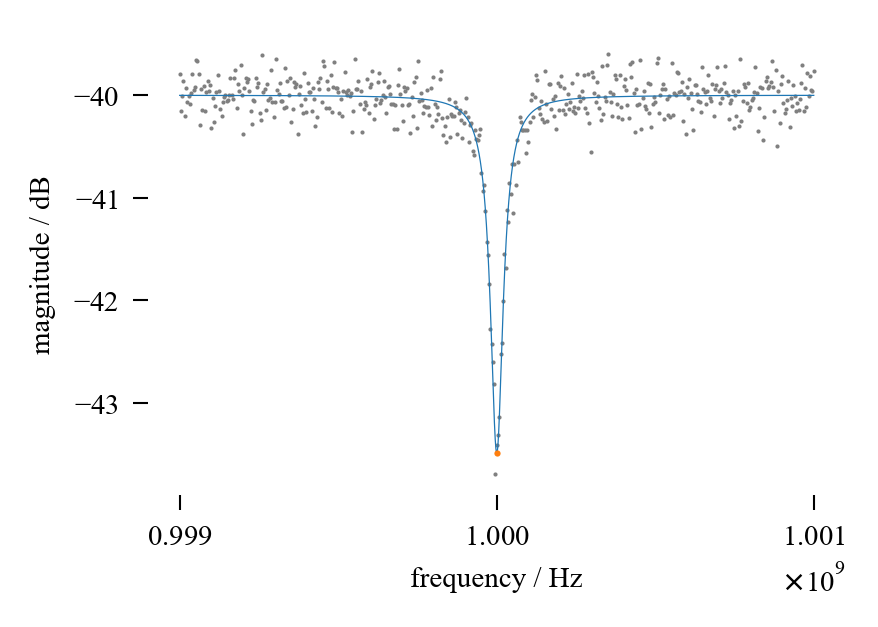

In [4]:
params = lmfit.Parameters()
params.add(name='coupling_loss', value=5e-5, vary=False)
r = reflection.ReflectionFitter(frequency=frequency, data=data, params=params)
fig, ax = plt.subplots()
see.magnitude_vs_frequency(resonator=r, axes=ax)
print(r.result.fit_report())  # Note that coupling_loss is now fixed